In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
import seaborn as sns



In [27]:
data = pd.read_csv('data.csv')
data['LogLH'] = np.log(data['LH'])
data['Female'] = (data['Gender'] == "Female").astype('int')
data['NormalLight'] = (data['Light'] == "Normal Light").astype('int')
dosage_dummies = pd.get_dummies(data['Dosage'], prefix='Dosage').astype(int)
data = pd.concat([dosage_dummies, data], axis=1)
data.head()



,Dosage_0,Dosage_10,Dosage_50,Dosage_250,Dosage_1250,Gender,Dosage,Light,LH,LogLH,Female,NormalLight
0,1,0,0,0,0,Male,0,Normal Light,212,5.356586,0,1
1,1,0,0,0,0,Male,0,Normal Light,27,3.295837,0,1
2,1,0,0,0,0,Male,0,Normal Light,68,4.219508,0,1
3,1,0,0,0,0,Male,0,Normal Light,72,4.276666,0,1
4,1,0,0,0,0,Male,0,Normal Light,130,4.867534,0,1


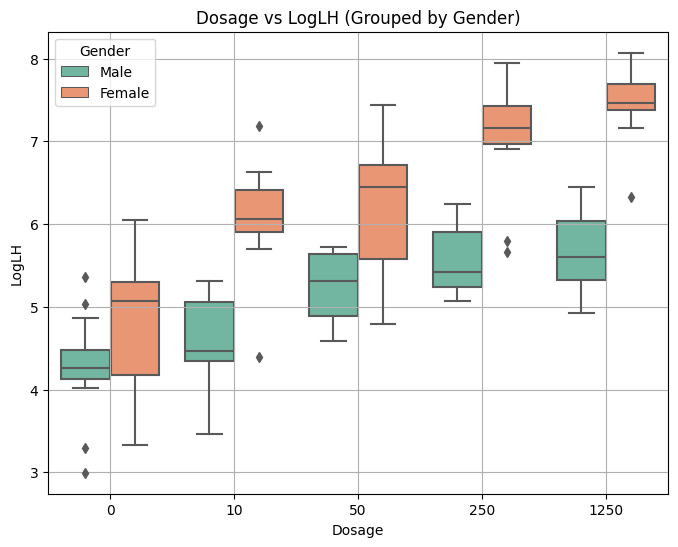

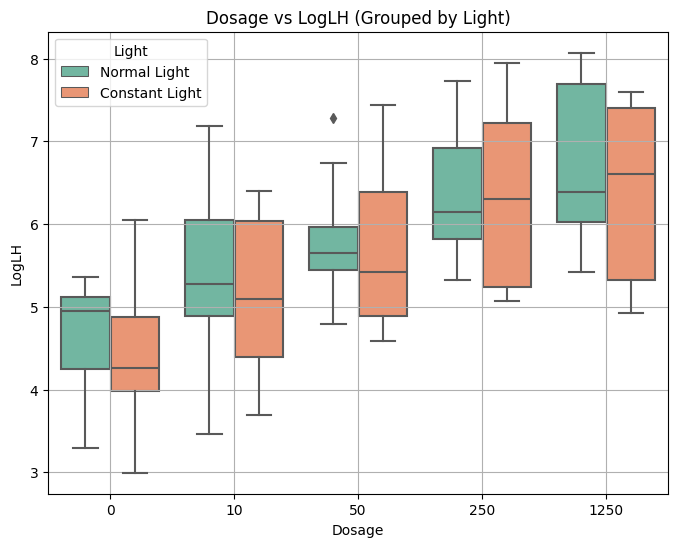

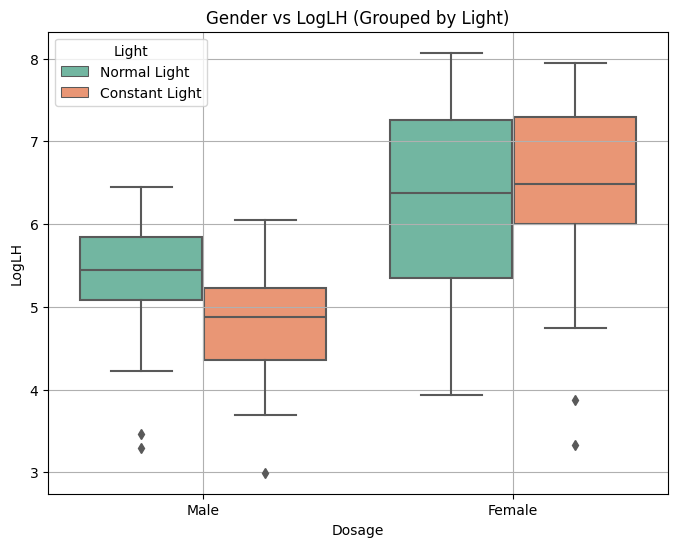

In [5]:
#Data BoxPlots
# Plot Dosage vs Y grouped by Gender using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Dosage', y='LogLH', hue='Gender', palette='Set2')
plt.title('Dosage vs LogLH (Grouped by Gender)')
plt.xlabel('Dosage')
plt.ylabel('LogLH')
plt.legend(title='Gender', loc='upper left')
plt.grid(True)
plt.show()

# Plot Dosage vs Y grouped by LightType using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Dosage', y='LogLH', hue='Light', palette='Set2')
plt.title('Dosage vs LogLH (Grouped by Light)')
plt.xlabel('Dosage')
plt.ylabel('LogLH')
plt.legend(title='Light', loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='LogLH', hue='Light', palette='Set2')
plt.title('Gender vs LogLH (Grouped by Light)')
plt.xlabel('Dosage')
plt.ylabel('LogLH')
plt.legend(title='Light', loc='upper left')
plt.grid(True)
plt.show()


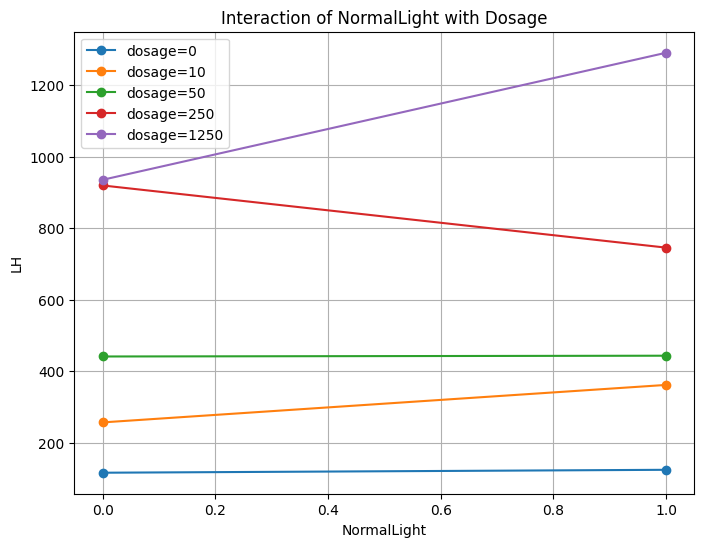

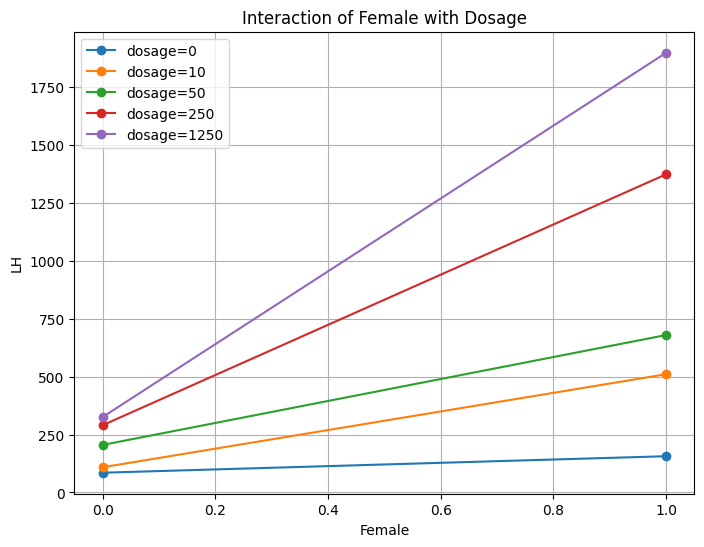

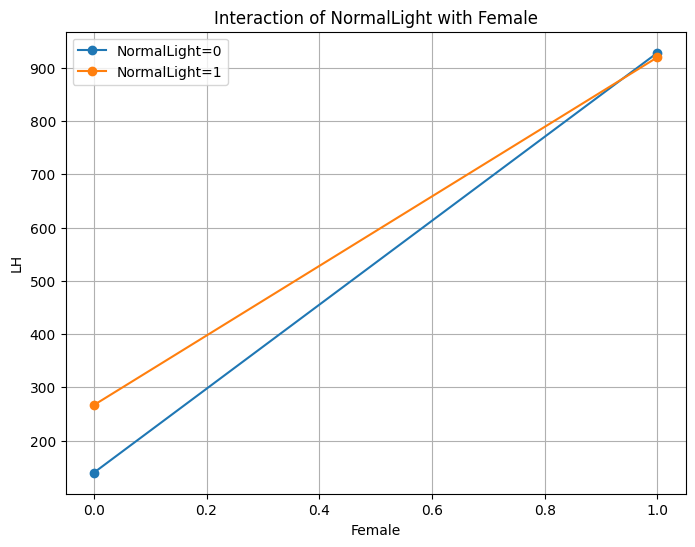

In [34]:
# INTERACTION PLOTS

#Dosage by Light Interaction Plot
means_df = data.groupby(['Dosage', 'NormalLight'])['LH'].mean().reset_index()

plt.figure(figsize=(8, 6))
for dosage_val in sorted(means_df['Dosage'].unique()):
    df_subset = means_df[means_df['Dosage'] == dosage_val]
    
    plt.plot(df_subset['NormalLight'], df_subset['LH'], marker='o', label=f'dosage={dosage_val}')
plt.xlabel('NormalLight')
plt.ylabel('LH')
plt.title('Interaction of NormalLight with Dosage')
plt.legend()
plt.grid(True)
plt.show()


#Dosage by Sex Interaction Plot
means_df = data.groupby(['Dosage', 'Female'])['LH'].mean().reset_index()

plt.figure(figsize=(8, 6))
for dosage_val in sorted(means_df['Dosage'].unique()):
    df_subset = means_df[means_df['Dosage'] == dosage_val]
    
    plt.plot(df_subset['Female'], df_subset['LH'], marker='o', label=f'dosage={dosage_val}')
plt.xlabel('Female')
plt.ylabel('LH')
plt.title('Interaction of Female with Dosage')
plt.legend()
plt.grid(True)
plt.show()

#Light by Sex Interaction Plot
means_df = data.groupby(['NormalLight', 'Female'])['LH'].mean().reset_index()

plt.figure(figsize=(8, 6))
for dosage_val in sorted(means_df['NormalLight'].unique()):
    df_subset = means_df[means_df['NormalLight'] == dosage_val]
    
    plt.plot(df_subset['Female'], df_subset['LH'], marker='o', label=f'NormalLight={dosage_val}')
plt.xlabel('Female')
plt.ylabel('LH')
plt.title('Interaction of NormalLight with Female')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def fit_lm(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

In [37]:
# Model Data Grouping
X = data[['Dosage_0', 'Dosage_10', 'Dosage_50', 'Dosage_250', 'Dosage_1250', 'NormalLight', 'Female']]
y = data['LH']
y_log = data['LogLH']

model = fit_lm(X, y)
model_log = fit_lm(X, y_log)



                            OLS Regression Results                            
Dep. Variable:                     LH   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     24.26
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           2.66e-18
Time:                        22:17:53   Log-Likelihood:                -903.34
No. Observations:                 120   AIC:                             1821.
Df Residuals:                     113   BIC:                             1840.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         144.4653     61.080      2.365      

In [38]:
#Interaction Terms WIP, picking based off above charts
X['Female:NormalLight'] = X['Female'] * X['NormalLight']

# X['Female:Dosage_0'] = X['Female'] * X['Dosage_0']
# X['Female:Dosage_10'] = X['Female'] * X['Dosage_10'] 
# X['Female:Dosage_50'] = X['Female'] * X['Dosage_50'] 
# X['Female:Dosage_250'] = X['Female'] * X['Dosage_250'] 
X['Female:Dosage_1250'] = X['Female'] * X['Dosage_1250'] 
 
# X['Dosage_0:NormalLight'] = X['Dosage_0'] * X['NormalLight']
# X['Dosage_10:NormalLight'] = X['Dosage_10'] * X['NormalLight']
# X['Dosage_50:NormalLight'] = X['Dosage_50'] * X['NormalLight']
# X['Dosage_250:NormalLight'] = X['Dosage_250'] * X['NormalLight']
# X['Dosage_1250:NormalLight'] = X['Dosage_1250'] * X['NormalLight']

interaction_model = fit_lm(X, y)
interaction_model_log = fit_lm(X, y_log)

                            OLS Regression Results                            
Dep. Variable:                     LH   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     27.37
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           5.23e-23
Time:                        22:17:54   Log-Likelihood:                -887.64
No. Observations:                 120   AIC:                             1793.
Df Residuals:                     111   BIC:                             1818.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                116.2222     62

/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_59048/190869489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Female:NormalLight'] = X['Female'] * X['NormalLight']
/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_59048/190869489.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Female:Dosage_1250'] = X['Female'] * X['Dosage_1250']


In [12]:
# Improved Models
# improved_model = fit_lm(X.drop(columns=['Dosage:NormalLight']), y)
# improved_model_log = fit_lm(X.drop(columns=['Dosage:NormalLight']), y_log)

                            OLS Regression Results                            
Dep. Variable:                     LH   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     36.96
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           2.31e-22
Time:                        21:20:14   Log-Likelihood:                -895.19
No. Observations:                 120   AIC:                             1802.
Df Residuals:                     114   BIC:                             1819.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 91.7916     86

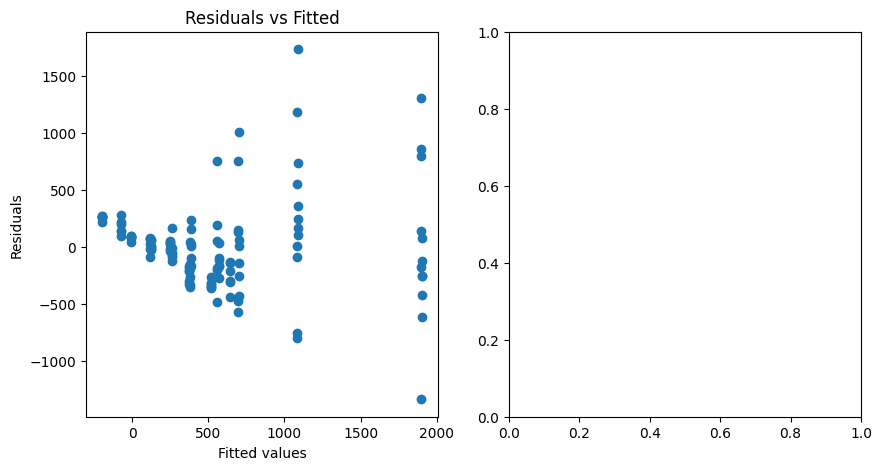

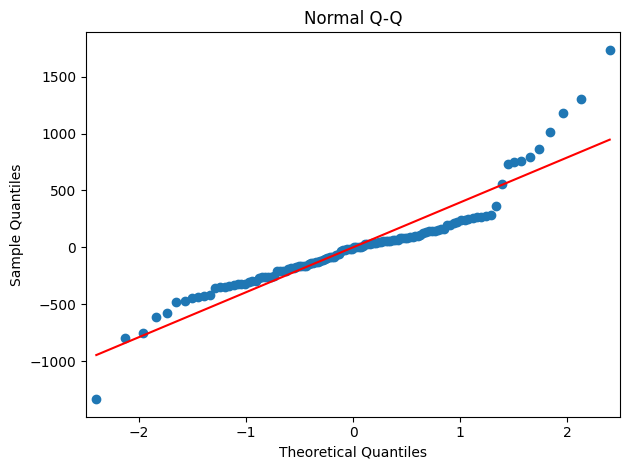

Text(0.5, 0, 'Residual Value')

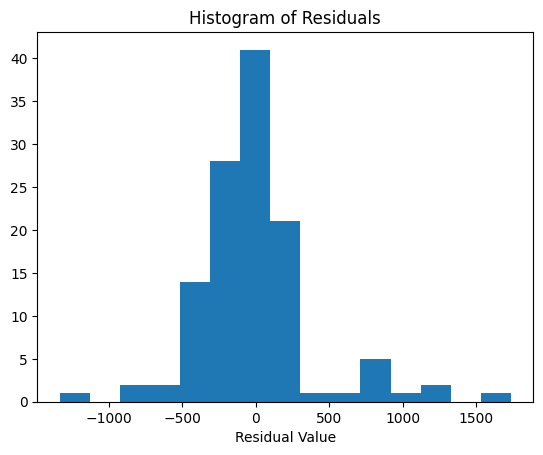

In [43]:
#TODO: examine residual plots, determine if log necessary.

# Get the fitted values and residuals
fitted_values = interaction_model.fittedvalues
residuals = interaction_model.resid

# Plot residuals versus fitted values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Plot Normal-QQ plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q')
plt.tight_layout()
plt.show()


plt.hist(residuals, bins = 10)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')


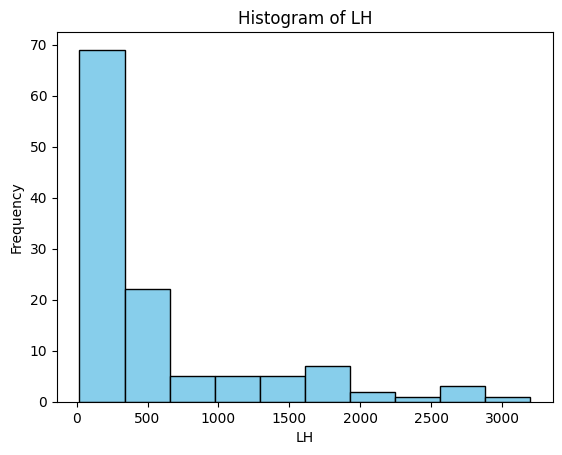

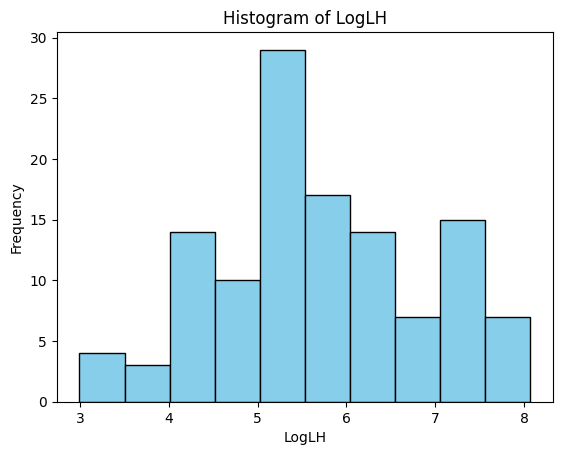

In [13]:
#HISTOGRAM PLOTS
plt.hist(data['LH'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('LH')
plt.ylabel('Frequency')
plt.title('Histogram of LH')

# Show the plot
plt.show()

plt.hist(data['LogLH'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('LogLH')
plt.ylabel('Frequency')
plt.title('Histogram of LogLH')

# Show the plot
plt.show()


In [42]:
# TODO: Get better understanding of when to, when not to use VIF.
vif = pd.DataFrame()
vif["Predictor"] = X.columns
vif["VIF"] = [1 / (1 - model.rsquared_adj)] * (len(X.columns))
vif = vif.round(2)
print(vif)

   Predictor   VIF
0     Dosage  2.03
1  LightType  2.03
2     Gender  2.03
